In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("raj713335/twittesentimentanalysis")


In [5]:
print("Path to dataset files:", path)

#C:\Users\hp\.cache\kagglehub\datasets\raj713335\twittesentimentanalysis\versions\1

tweets = pd.read_csv(f"{path}/tweets.csv", encoding = "ISO-8859-1", names= ["Target", "ID", "Date", "Query", "User", "Text"], header=None)

tweets.head()

Path to dataset files: C:\Users\hp\.cache\kagglehub\datasets\raj713335\twittesentimentanalysis\versions\1


,Target,ID,Date,Query,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [87]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1600000 non-null  int64 
 1   ID      1600000 non-null  int64 
 2   Date    1600000 non-null  object
 3   Query   1600000 non-null  object
 4   User    1600000 non-null  object
 5   Text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## This data do not have any null Values ,let us check if it has outliers


(-5.0, 10.0)

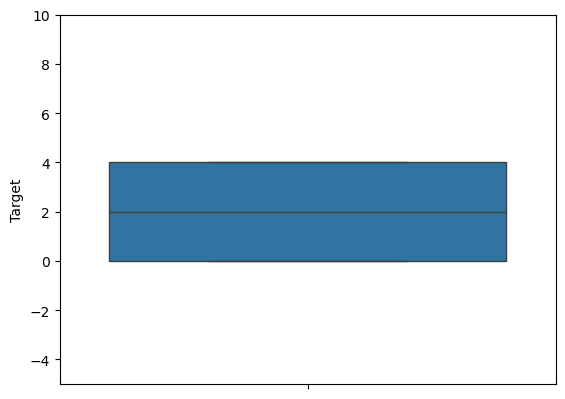

In [15]:
#Target column has not outliers and it betwee [0:4]
sns.boxplot(data=tweets['Target'])
plt.ylim(-5,10)

In [27]:
#ID has not negative values
tweets[tweets['ID']<0].value_counts().sum()

0

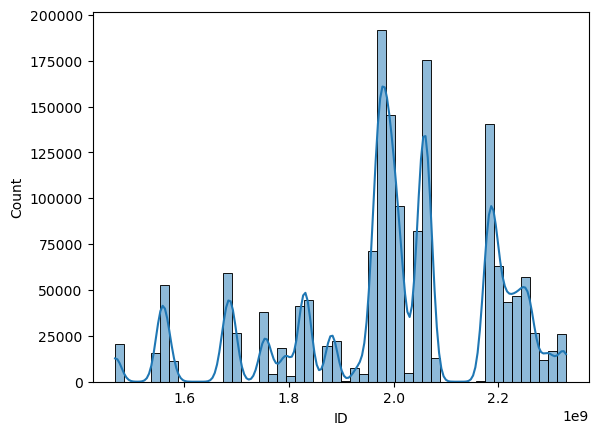

In [29]:
sns.histplot(tweets['ID'], bins=50, kde=True)
plt.show()

## Now we can say that our data is cleaned ,It hasnot neither outlier values nor null values


# Let us satart doing (Tokenization)

In [13]:
#to act with big data (replace .apply with .map_partitions)
#pip install dask

Note: you may need to restart the kernel to use updated packages.


# dask is a library faster than pandas with large data sets

In [15]:
import dask.dataframe as dd

In [33]:
#pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [17]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
import re
from nltk.tokenize import word_tokenize
from nltk.util import bigrams

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [68]:
#this function to extract the words 
def extract_words (text):
    if pd.isna(text): 
        return []
    words=word_tokenize(text)
    words=[re.sub(r'[^\w\s]', '',word)for word in words if not word.startswith(('@','#'))]
    return words

In [70]:
#this function to extract grams
def extract_grams(text):
    if pd.isna(text):  
        return []
    words = extract_words(text)  # إعادة استخدام الدالة السابقة
    bigram_list = list(bigrams(words))  # إنشاء 2-grams
    return [' '.join(bigram) for bigram in bigram_list]

In [72]:
#to ectract mentions 
def extract_mentions(text):
    if pd.isna(text): 
        return []
    mentions = re.findall(r'@\w+',text)
    mention=[mention[1:] for mention in mentions]
    return mention

In [74]:
#to extract Hashtags
def extract_hashtags(text):
    if pd.isna(text):
        return []
    hashtags= re.findall(r'#\w+',text)
    hashtage=[tag[1:] for tag in hashtags]
    return hashtage

In [101]:
dask_df=dd.from_pandas(tweets,npartitions=4)
#dask_df.dtypes
dask_df.isnull().sum().compute()


Target    0
ID        0
Date      0
Query     0
User      0
Text      0
dtype: int64

In [102]:
dask_df['words'] = dask_df['Text'].map_partitions(lambda df: df.apply(extract_words))
dask_df['grams'] = dask_df['Text'].map_partitions(lambda df: df.apply(extract_grams))
dask_df['mentions'] = dask_df['Text'].map_partitions(lambda df: df.apply(extract_mentions))
dask_df['hashtags'] = dask_df['Text'].map_partitions(lambda df: df.apply(extract_hashtags))


In [103]:
total_size = dask_df.memory_usage(deep=True).sum().compute()
print(f"Total DataFrame size: {total_size / (1024**2):.2f} MB")


Total DataFrame size: 1124.41 MB


# Note!!! This memory usage is very big to be converted to pandas dataframe
# , so that I downloaded it as a CSV file & will read it with pandas 
## (it will be more fast)

In [107]:
dask_df.to_csv("processed_data.csv", index=False, single_file=True)


['C:\\Users\\hp\\final project DEPI\\processed_data.csv']

In [111]:
tokenized_data=pd.read_csv('C:\\Users\\hp\\final project DEPI\\processed_data.csv')

In [112]:
tokenized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 10 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Target    1600000 non-null  int64 
 1   ID        1600000 non-null  int64 
 2   Date      1600000 non-null  object
 3   Query     1600000 non-null  object
 4   User      1600000 non-null  object
 5   Text      1600000 non-null  object
 6   words     1600000 non-null  object
 7   grams     1600000 non-null  object
 8   mentions  1600000 non-null  object
 9   hashtags  1600000 non-null  object
dtypes: int64(2), object(8)
memory usage: 122.1+ MB


In [115]:
tokenized_data.head()

,Target,ID,Date,Query,User,Text,words,grams,mentions,hashtags
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","['switchfoot', 'http', '', 'twitpiccom2y1zl', ...","['switchfoot http', 'http ', ' twitpiccom2y1zl...",['switchfoot'],[]
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,"['is', 'upset', 'that', 'he', 'ca', 'nt', 'upd...","['is upset', 'upset that', 'that he', 'he ca',...",[],[]
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,"['Kenichan', 'I', 'dived', 'many', 'times', 'f...","['Kenichan I', 'I dived', 'dived many', 'many ...",['Kenichan'],[]
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"['my', 'whole', 'body', 'feels', 'itchy', 'and...","['my whole', 'whole body', 'body feels', 'feel...",[],[]
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","['nationwideclass', 'no', '', 'it', 's', 'not'...","['nationwideclass no', 'no ', ' it', 'it s', '...",['nationwideclass'],[]


In [127]:
tokenized_data['hashtags'].value_counts().head(10)

hashtags
[]                  1564153
['followfriday']       1932
['fb']                 1683
['squarespace']         758
['FF']                  520
['1']                   428
['FollowFriday']        414
['musicmonday']         370
['ff']                  354
['iranelection']        269
Name: count, dtype: int64

In [125]:
tokenized_data['mentions'].value_counts().head(10)

mentions
[]                     861507
['mileycyrus']           4145
['tommcfly']             3608
['ddlovato']             3109
['DavidArchie']          1215
['Jonasbrothers']        1197
['DonnieWahlberg']       1020
['jordanknight']         1004
['mitchelmusso']          994
['JonathanRKnight']       970
Name: count, dtype: int64